In [2]:
using LinearAlgebra
using Plots
using DelimitedFiles

# Problem 1
## Part a
$ K = \frac{1}{2}m_{77}\dot{q}_7^2 = \frac{1}{2}J^T I J \dot{q}_7^2$

$ J = [0, 0, 1]^T $

so $m_{77} = I_{zz} = 0.25$

## Part b
To get an oscillatory system with no damping we need to cancel the damping due to friction, so we set $K_{v7} = -b$, which will be negative. This is dangerous to implement on real systems since this will add energy to the system, so if the cancellation is off the system can easily go unstable. Since this damping coefficient due to friction will change over use, this is a very bad idea in practice.

## Part c
The natural frequency is given by
$$\omega_n = \sqrt{\frac{k}{m}} = \sqrt{\frac{K_{p7}}{m_{77}}} \approx14.14 $$

## Part d
$K_{v7} = 0.3$ 

Found by slowly incrementing it until the end effector looked like it was oscillating without increasing or decreasing in amplitude.

## Part e

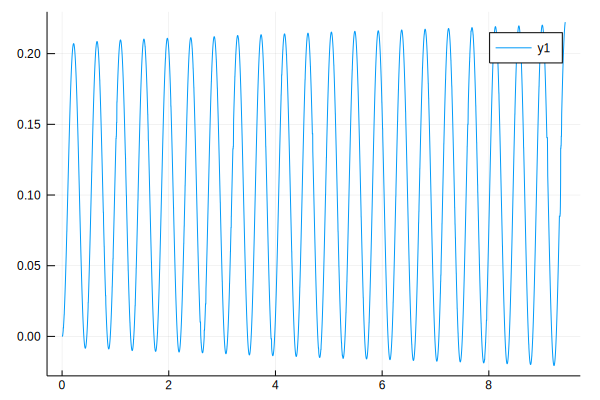

In [67]:
data = readdlm("../bin/hw2/prob1.txt")
time = (1:length(data)) ./ 1000
plot(time,data)

In [51]:
N = 9.1
freq = 9.1/4*2pi

14.294246573833558

Expected frequency: 14.14 rad/s  
Measured frequency: 14.29 rad/s  
Error: 1%  

The behavior pretty much matched the expected, which was nice to see. There will of course be some differences since the motion of the end effector will cause motion in the rest of the arm due to dynamic coupling, which is not captured by the expected value.

# Problem 2

## Part a
$$ K_v = 28.28 $$

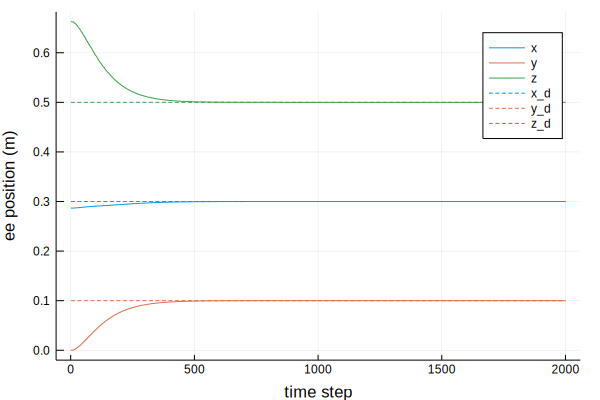

In [61]:
data2 = readdlm("../bin/hw2/prob2.txt",',')
plot(data2[1:2000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x, :y, :z])
des = repeat([0.3,0.1,0.5],1,2000)
plot!(des',color=[1 2 3],label=["x_d" "y_d" "z_d"],style=:dash)

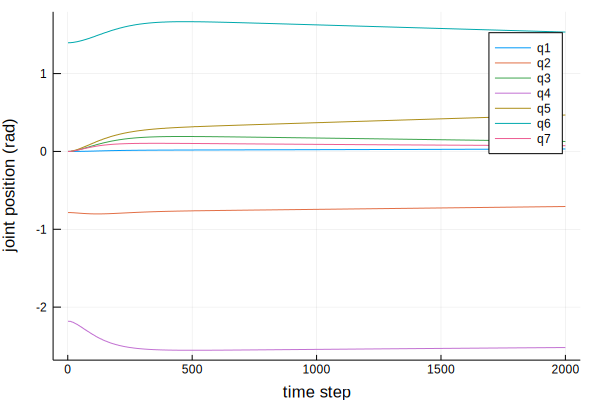

In [62]:
plot(data2[1:2000,4:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

## Part b
Since the task is in 3 DOF and the robot has 7 DOF, there are extra DOF that are not being controlled so are free to move around (in the nullspace).

# Part c
I found that a value of 
$$ K_{vj} = 10 $$
worked well. I found it by increasing it until it came to rest at the goal but didn't move too slowly.

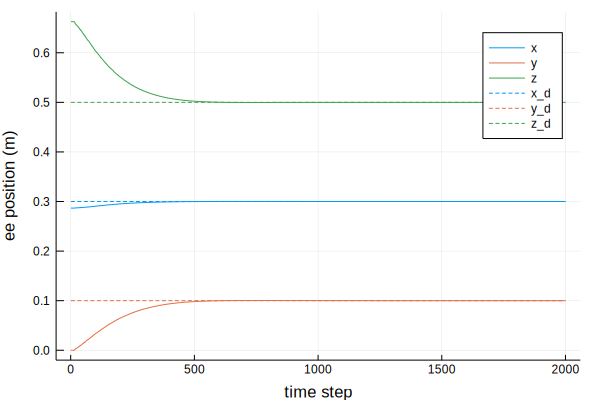

In [63]:
data2c = readdlm("../bin/hw2/prob2c.txt",',')
plot(data2c[1:2000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x, :y, :z])
plot!(des',color=[1 2 3],label=["x_d" "y_d" "z_d"],style=:dash)

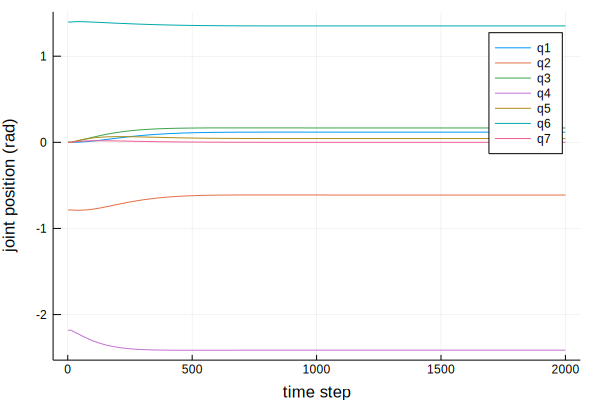

In [25]:
plot(data2c[1:2000,4:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

The robot performs the task much better with damping: it reaches the goal and then stays there, whereas before the rest of the arm moved around. The damping effectively keeps it from having velocity at the joints. It also moves pretty slowly as a result.

## Part d

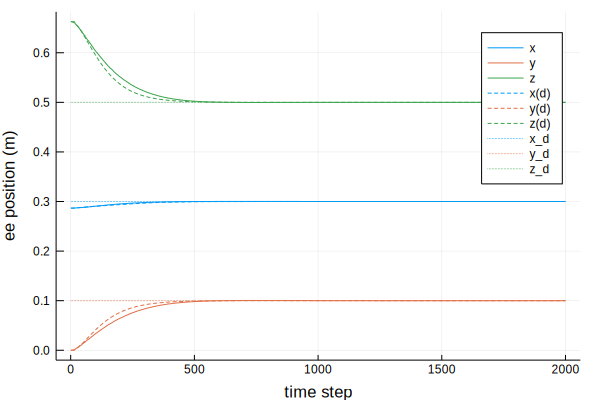

In [65]:
data2d = readdlm("../bin/hw2/prob2d.txt",',')
plot(data2c[1:2000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z])
plot!(data2d[1:2000,1:3],xlabel="time step",ylabel="ee position (m)",label=["x(d)" "y(d)" "z(d)"],color=[1 2 3],style=:dash)
plot!(des',color=[1 2 3],label=["x_d" "y_d" "z_d"],style=:dot)

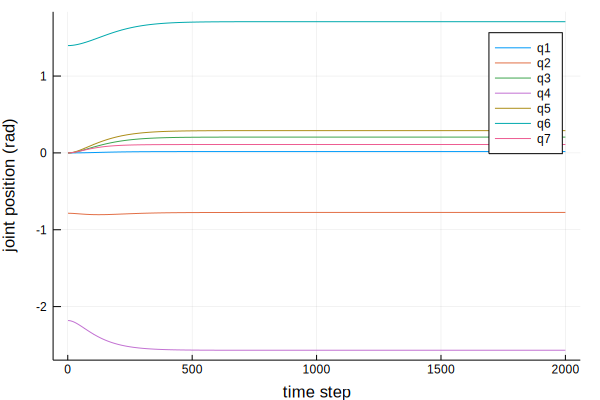

In [23]:
plot(data2d[1:2000,4:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

The response for the arm with the nullspace formulation is faster than just doing it on all of the joints. However, the difference isn't huge since I picked my damping term pretty well. If I'd had picked a larger value of $K_v$ the difference would have been more significant.

# Problem 3
## Part a

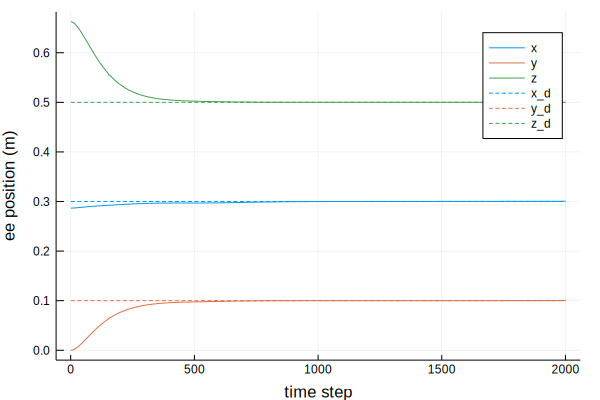

In [66]:
data3 = readdlm("../bin/hw2/prob3.txt",',')
plot(data3[1:2000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z])
plot!(des',color=[1 2 3],label=["x_d" "y_d" "z_d"],style=:dash)

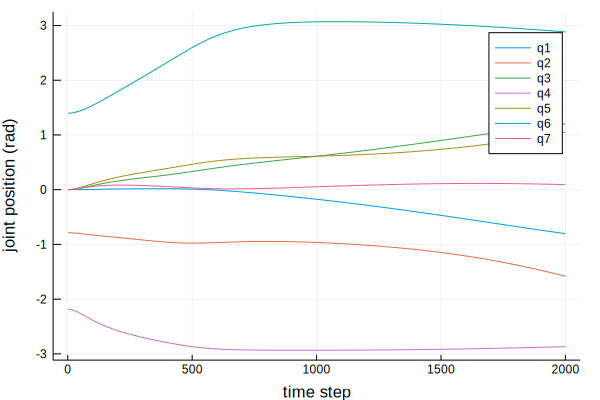

In [34]:
plot(data3[1:2000,4:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

The arm moves to the desired location quickly but the arm appears to "fall" while maintaining the position at the end effector. 

## Part b
We don't see this behavior with joint space gravity compensation since it is calculating the torque needed at each joint in order to compensate for gravity. Here it is will only be compensating for gravity at the end effector.

# Problem 4
## Part i
Controller:

$p = \bar{J}^Tg$

$F = \Lambda(k_p(x_d-x)-k_v \dot{x}) + p$

$\Gamma = J_v^TF - N^TMK_{vj}\dot{q}$

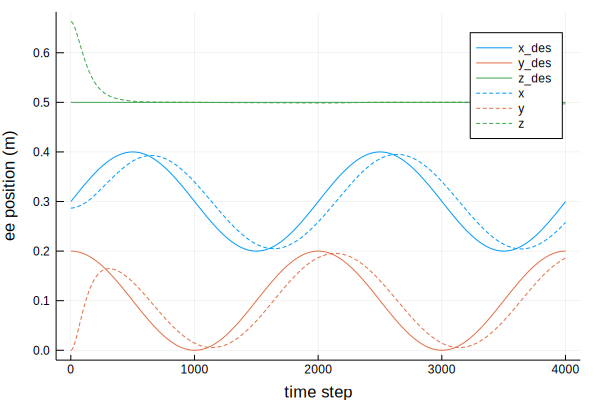

In [11]:
data4i = readdlm("../bin/hw2/prob4a.txt",',')
plot(data4i[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4i[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

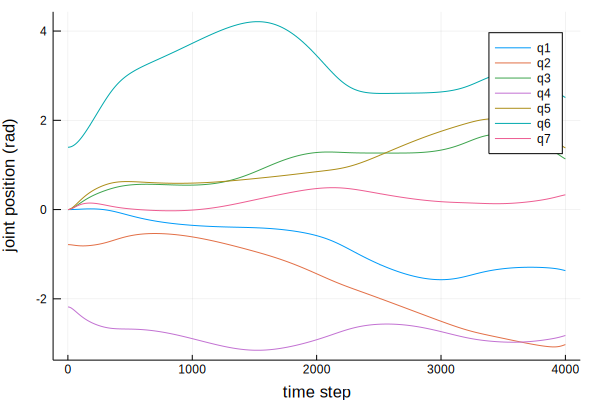

In [14]:
plot(data4i[1:4000,7:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

The arm still "falls" since we don't have gravity compensation on all the joints, but it does track the trajectory, although it does have a slight time delay.

## Part ii
Controller

$p = \bar{J}^Tg$

$F = (k_p(x_d-x)-k_v \dot{x}) + p$

$\Gamma = J_v^TF - N^TMK_{vj}\dot{q}$

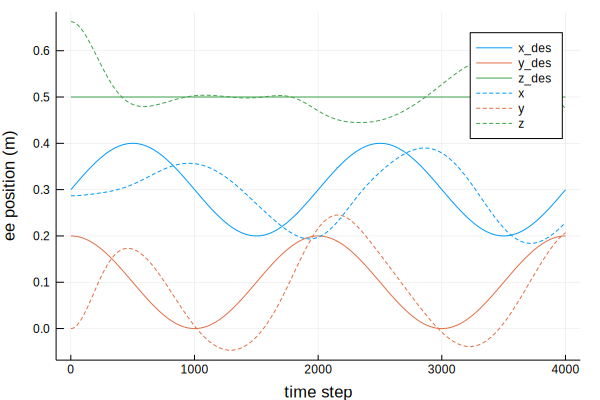

In [24]:
data4ii = readdlm("../bin/hw2/prob4b.txt",',')
plot(data4ii[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4ii[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

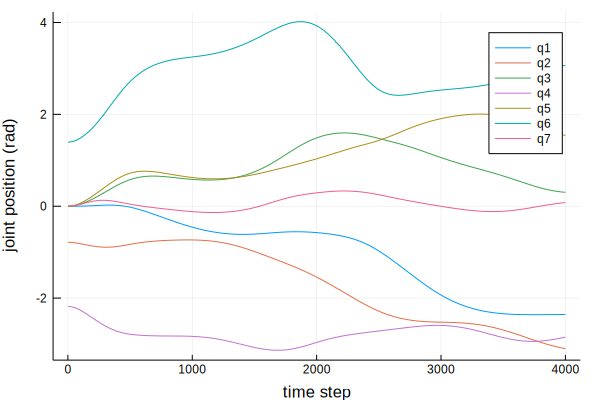

In [25]:
plot(data4ii[1:4000,7:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

Setting $\Lambda$ equal to identity makes it track much worse than before, since it is not able to correctly account for the dynamics of the robot. You can see this since the z term loosing tracking whereas before it was fine.

## Part iii
Controller

$p = \bar{J}^Tg$

$F = \Lambda(k_p(x_d-x)-k_v \dot{x}) + p$

$\Gamma = J_v^TF + M(-K_p(q - q_d) - K_v\dot{q}) $

I set $K_p = 400$ and $K_v$ = 40, the same values we used in the last homework since they seemed to work well.

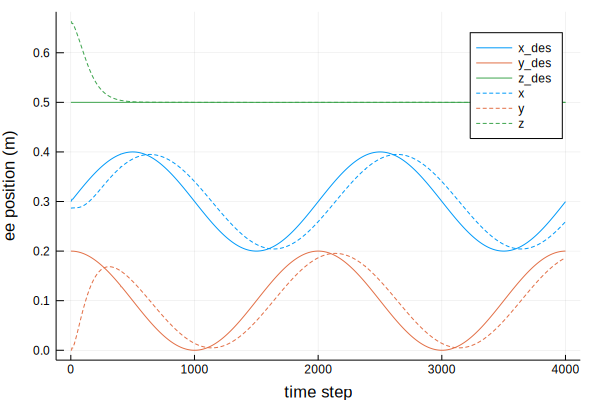

In [68]:
data4iii = readdlm("../bin/hw2/prob4c.txt",',')
plot(data4iii[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4iii[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

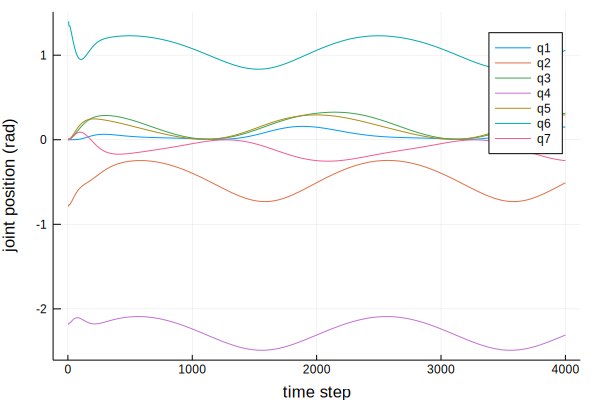

In [69]:
plot(data4iii[1:4000,7:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

This controller keeps the robot from "falling" but it doesn't track super well in the z direction since it isn't accounting for gravity at each of the joints.

## Part iv
Controller

$p = \bar{J}^Tg$

$F = \Lambda(k_p(x_d-x)-k_v \dot{x}) + p$

$\Gamma = J_v^TF + N^T M(-K_p(q - q_d) - K_v\dot{q}) + N^Tg$

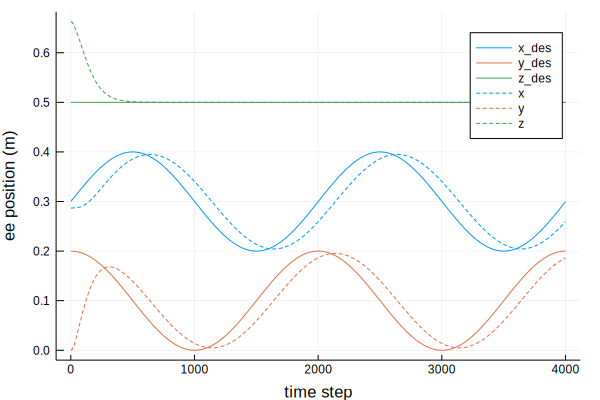

In [70]:
data4iv = readdlm("../bin/hw2/prob4d.txt",',')
plot(data4iv[1:4000,1:3],xlabel="time step",ylabel="ee position (m)",label=[:x_des :y_des :z_des])
plot!(data4iv[1:4000,4:6],xlabel="time step",ylabel="ee position (m)",label=[:x :y :z], color=[1 2 3], style=:dash)

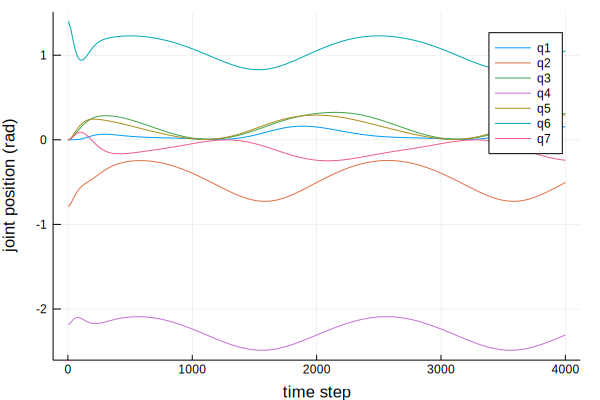

In [71]:
plot(data4iv[1:4000,7:end],xlabel="time step",ylabel="joint position (rad)",label=["q" * string(i) for i = 1:7])

This seems to make very little difference, which is cool. If we don't multiply by $N^T$ it caused a steady-state offsent in z.